# KNN model for predicting racket type using datasets P1, P2, and P3, based on **MFCC** - Sound

### Model Description

This notebook implements a K-Nearest Neighbors (KNN) model to predict the type of a racket (RB, RO, RR, RV) based on sound features extracted from audio files. The workflow involves reading `.wav` files, **MFCC** using FFT, and training the model using these features. The model's performance is evaluated using accuracy metrics and visualized through scatter plots and a confusion matrix.

### Import libraries

In [2]:
import os
import glob
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from scipy.io import wavfile
from scipy.fft import fft
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# import openpyxl


### Import Tools Functions

In [3]:
import sys
# Reach the project root
notebook_path = os.path.abspath('')
project_root = os.path.abspath(os.path.join(notebook_path, '../../../'))
functions_path = os.path.join(project_root, 'Functions')

# Add Functions folder
if functions_path not in sys.path:
    sys.path.append(functions_path)

['P1_RB_1_C_1.wav', 'P1_RB_1_C_2.wav', 'P1_RB_1_C_3.wav', 'P1_RB_1_S_1.wav', 'P1_RB_1_S_2.wav', 'P1_RB_1_S_3.wav', 'P1_RB_1_V_1.wav', 'P1_RB_1_V_2.wav', 'P1_RB_1_V_3.wav', 'P1_RB_2_C_1.wav', 'P1_RB_2_C_2.wav', 'P1_RB_2_C_3.wav', 'P1_RB_2_S_1.wav', 'P1_RB_2_S_2.wav', 'P1_RB_2_S_3.wav', 'P1_RB_2_V_1.wav', 'P1_RB_2_V_2.wav', 'P1_RB_2_V_3.wav', 'P1_RB_3_C_1.wav', 'P1_RB_3_C_2.wav', 'P1_RB_3_C_3.wav', 'P1_RB_3_S_1.wav', 'P1_RB_3_S_2.wav', 'P1_RB_3_S_3.wav', 'P1_RB_3_V_1.wav', 'P1_RB_3_V_2.wav', 'P1_RB_3_V_3.wav', 'P1_RB_4_C_1.wav', 'P1_RB_4_C_2.wav', 'P1_RB_4_C_3.wav', 'P1_RB_4_S_1.wav', 'P1_RB_4_S_2.wav', 'P1_RB_4_S_3.wav', 'P1_RB_4_V_1.wav', 'P1_RB_4_V_2.wav', 'P1_RB_4_V_3.wav', 'P1_RB_5_C_1.wav', 'P1_RB_5_C_2.wav', 'P1_RB_5_C_3.wav', 'P1_RB_5_S_1.wav', 'P1_RB_5_S_2.wav', 'P1_RB_5_S_3.wav', 'P1_RB_5_V_1.wav', 'P1_RB_5_V_2.wav', 'P1_RB_5_V_3.wav', 'P1_RB_6_C_1.wav', 'P1_RB_6_C_2.wav', 'P1_RB_6_C_3.wav', 'P1_RB_6_S_1.wav', 'P1_RB_6_S_2.wav', 'P1_RB_6_S_3.wav', 'P1_RB_6_V_1.wav', 'P1_RB_6_V_

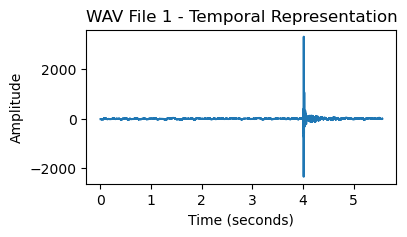

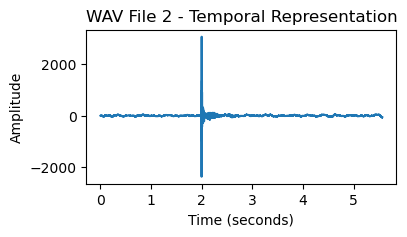

In [4]:
from readWavFolder import readWavFolder
    
samplerateVect,testWavFileVect,filename = readWavFolder("../../../Data/Sound/P1/")
print(filename)
for i, wav_data in enumerate(testWavFileVect[:2]):
    plt.figure(figsize=(4, 2))
    time_axis = [x / samplerateVect[i] for x in range(len(wav_data))]
    plt.plot(time_axis, wav_data[:, 0])  # Plot only the first channel
    plt.title(f"WAV File {i + 1} - Temporal Representation")
    plt.xlabel("Time (seconds)")
    plt.ylabel("Amplitude")
    plt.show()


Spectrum

In [5]:
from spectrumFromSignal import spectrumFromSignal


spectrumVect=[]
spectrumVectFreqs=[]
for i in range(len(testWavFileVect)):
    spectrum,freqs = spectrumFromSignal(testWavFileVect[i], samplerateVect[i])
    spectrumVect.append(spectrum)
    spectrumVectFreqs.append(freqs)



MFCC

In [6]:
import librosa



## Main

In [ ]:
raquetteTypeList = {"RB": 0, "RO": 1, "RR": 2, "RV": 3}
used = False
bd=10

results = []


X_Hz = []
X_Amplitude = []
Y_Label = []

# Create a DataFrame to store details of each wav file
wav_files_data = []

# Process each folder (P1, P2, P3)
for folder, folder_path in [("P1", "../../../Data/Sound/P1"), 
                            ("P2", "../../../Data/Sound/P2"), 
                            ("P3", "../../../Data/Sound/P3")]:
    sample_rates, wav_files, file_names = readWavFolder(folder_path)
    
    for sample_rate, wav_file, file_name in zip(sample_rates, wav_files, file_names):
        wav_files_data.append({
            "Folder": folder,
            "File_Name": file_name,
            "Sample_Rate": sample_rate,
            "Signal": wav_file
        })

# Convert the list of dictionaries into a DataFrame
wav_files_df = pd.DataFrame(wav_files_data)

# Display the DataFrame
print(wav_files_df)

# For each wav file, extract its spectrum, filter it between 150 and 1000 Hz, and take the top n peaks
for i in range(len(wav_files_df["Signal"])):
    if "C" in wav_files_df["File_Name"][i]:
        if 'RB' in wav_files_df["File_Name"][i]:
            raquetteType = 'RB'
        elif 'RR' in wav_files_df["File_Name"][i]:
            raquetteType = 'RR'
        elif 'RO' in wav_files_df["File_Name"][i]:
            raquetteType = 'RO'
        elif 'RV' in wav_files_df["File_Name"][i]:
            raquetteType = 'RV'
            
        spectrum,freqs = spectrumFromSignal(wav_files_df["Signal"][i], wav_files_df["Sample_Rate"][i])
        spectrumVect.append(spectrum) 

        # Convert the signal to floating-point format
        signal_float = wav_files_df["Signal"][i][:, 0].astype(float) / np.max(np.abs(wav_files_df["Signal"][i][:, 0]))
        mfccs = librosa.feature.mfcc(y=signal_float, sr=wav_files_df["Sample_Rate"][i], n_mfcc=13)
        
        band_frequencies = np.mean(mfccs, axis=1)
        band_energies = {"peak_heights": np.std(mfccs, axis=1)}

        X_Hz.append(band_frequencies)
        # print(band_energies)
        X_Amplitude.append(band_energies["peak_heights"])

        Y_Label.append(raquetteType)

# Normalize the amplitudes
X_Amplitude = [peak_values / np.max(peak_values) for peak_values in X_Amplitude]

# Ensure all arrays in X_peaksHz and X_peaksAmplitude have the same length
max_length = max(max(len(peaks) for peaks in X_Hz), max(len(amps) for amps in X_Amplitude))
X_Hz_padded = [np.pad(peaks, (0, max_length - len(peaks)), constant_values=0) for peaks in X_Hz]
X_Amplitude_padded = [np.pad(amps, (0, max_length - len(amps)), constant_values=0) for amps in X_Amplitude]

# Combine the frequencies and amplitudes into a single feature matrix
X = np.hstack((np.array(X_Hz_padded), np.array(X_Amplitude_padded)))

# Encode string labels into integers
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(Y_Label)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None, shuffle=True)
# Define the ranges of values for the hyperparameters
n_neighbors_range = range(1, 21)  # Number of neighbors
weights_options = ['uniform', 'distance']  # Weighting method
metric_options = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']  # Metrics

# Test all combinations of hyperparameters
for n_neighbors in n_neighbors_range:
    for weights in weights_options:
        for metric in metric_options:
            # Create and train the KNN model
            knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, metric=metric)
            knn.fit(X_train, y_train)

            # Evaluate on the test set
            y_pred = knn.predict(X_test)
            accuracy_test = accuracy_score(y_test, y_pred)

            # Evaluate on the training set
            y_train_pred = knn.predict(X_train)
            accuracy_train = accuracy_score(y_train, y_train_pred)

            # Switch case for channel
            if c == 0:
                channel_name = "Left"
            elif c == 1:
                channel_name = "Right"
            
            # Add channel name to results
            results.append({
                'Chanel_Name': channel_name,
                'band_width': bd,
                'n_neighbors': n_neighbors,
                'weights': weights,
                'metric': metric,
                'accuracy_train': accuracy_train,
                'accuracy_test': accuracy_test
            })

# Convert the results into a DataFrame
results_df = pd.DataFrame(results)


Chanel 0
    Folder                  File_Name  Sample_Rate  \
0       P1            P1_RB_1_C_1.wav        44100   
1       P1            P1_RB_1_C_2.wav        44100   
2       P1            P1_RB_1_C_3.wav        44100   
3       P1            P1_RB_1_S_1.wav        44100   
4       P1            P1_RB_1_S_2.wav        44100   
..     ...                        ...          ...   
737     P3  RV_6_C_Salve1Segment5.wav        44100   
738     P3  RV_6_C_Salve1Segment6.wav        44100   
739     P3  RV_6_C_Salve1Segment7.wav        44100   
740     P3  RV_6_C_Salve1Segment8.wav        44100   
741     P3  RV_6_C_Salve1Segment9.wav        44100   

                                                Signal  
0    [[-24, -13], [-23, -14], [-23, -14], [-23, -13...  
1    [[-9, -1], [-8, -2], [-9, -1], [-8, -1], [-10,...  
2    [[-70, -59], [-71, -59], [-70, -59], [-70, -59...  
3    [[535, 506], [536, 506], [536, 506], [535, 506...  
4    [[0, -3], [0, -3], [0, -4], [0, -2], [1, -3], ...  
